# Project Overview

Our project analyzes laptop pricing and features to identify key factors influencing prices and consumer preferences. By gathering data from platforms like **Amazon**, **Flipkart**, and **BestBuy**, we aim to help consumers make informed choices and assist retailers in optimizing their offerings.


---

# Data Collection and Update

To build accurate machine learning models, we initially collected data from the selected e-commerce platforms and then enhanced the dataset by adding more columns and performing further cleaning. This additional data will help in fine-tuning our models and ensuring more reliable and accurate predictions.

We have expanded our dataset to include a diverse set of new features such as:
- Laptop_Model_Number
- Display_Resolution
- Extracted_Rating
- Battery_Life(Hours_Upto)
- Stock
- Time_Of_Extraction
- URL
- Storage_Capacity(GB)
- Display_Size(Inches)
- Laptop_Dimensions
- Laptop_Weight(Pounds)

This cleaned and expanded dataset will allow us to assess how each feature impacts laptop pricing.

---

# Machine Learning Approach

For the analysis, we will be using several *machine learning models* to predict the price of laptops based on the features in our dataset. These models will help identify relationships between the laptop features and the price, which can later be used to predict prices for unseen data or suggest pricing strategies.

Some of the sample models we will apply include:
- *Random Forest Regression*
- *SVM Regression*
- *Decision Tree Regressor*
- *GBDT Regression*
- *XGBoost Regression*
- *Linear Regression*
- *KNN Regressor*
- *Ridge Regression*

Each of these models will be trained on the features we’ve mentioned in our exploratory data analysis (EDA) questions, as well as the new columns we've added during the data update process.

---

# Focused Features

We have selected the following features for price prediction, ensuring they capture a comprehensive range of factors that influence laptop prices and are optimized for model suitability:
- *Brand*
- *Processor_Brand* (Intel, AMD, etc.)
- *Operating_System* (Windows, macOS, etc.)
- *Storage_Type* (SSD, HDD, etc.)
- *Processor_Model* (i5, Ryzen 5, etc.)
- *Extracted_Rating* (Customer rating)
- *Storage_Capacity (GB)*
- *Display_Size (Inches)*
- *RAM (GB)*
- *Stock* (Availability)
- *No_Of_Reviews* (Number of customer reviews)
- *Laptop_Weight (Pounds)*
- *Price* (Price in USD)

These features will serve as the key predictors in our machine learning models, and through testing and validation, we aim to verify how they contribute to predicting laptop prices.

---

# Overview Conclusion

By using the selected models and leveraging the updated dataset, our goal is to understand which laptop features most significantly impact pricing and how those features vary across different retail platforms. The results will not only inform the decision-making of consumers but also guide retailers and brands in optimizing their product offerings based on customer preferences and market trends.

# 1. Importing Modules

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

# 2. Loading The Dataset

In [2]:
cursor = sqlite3.connect(r'../database/laptrack.db')

laptop_df = pd.read_sql_query("SELECT * FROM Laptop_Phase_2_2", cursor)

cursor.close()

laptop_df.head()

,Brand,Laptop_Model_Name,Laptop_Model_Number,Processor_Brand,Processor_Model,Storage_Type,Operating_System,Display_Resolution,Extracted_Rating,Battery_Life(Hours_Upto),...,Stock,Time_Of_Extraction,URL,Source,Storage_Capacity(GB),Display_Size(Inches),RAM(GB),No_Of_Reviews,Laptop_Dimensions,Laptop_Weight(Pounds)
0,Dell,Latitude 3540 Laptop,None,Intel,1355U,SSD,Windows 11 Professional,1920x1080 MP,NaN,NaN,...,1,2024-11-04 18:23:39,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4000,15.6,64,0,0.71 x 14.13 x 9.44 inches,4.00
1,HP,17t-cn3004,17t-cn3004208,Intel,Intel Core i5,SSD,Windows 11 Pro,1600x900 Pixels,5.0,NaN,...,1,2024-11-04 18:23:42,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4096,17.3,64,0,0.81 x 10.15 x 15.78 inches,5.00
2,Dell,"Dell Inspiron 15.6"" Touchscreen Laptop",None,Intel,1355U,SSD,Windows 11 Pro,1920x1080 Pixels,NaN,NaN,...,1,2024-11-04 18:23:45,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4096,15.6,32,0,9.25 x 0.75 x 14.11 inches,3.60
3,Apple,MacBook Pro,Mvvm2ll/a,Intel,Core i9,SSD,Mac OS X 10.0 Cheetah,2560 x 1600 Pixels,4.0,11.0,...,1,2024-11-04 18:23:54,https://www.amazon.com/2019-Apple-MacBook-16-i...,Amazon,2048,16.0,16,0,15.63 x 2.40 x 11.14 inches,5.68
4,HP,TPN-Q279,TPN-Q279,AMD,Ryzen 5,SSD,Windows 11 Home,1920 x 1080 Pixels,3.8,NaN,...,1,2024-11-04 18:23:57,https://www.amazon.com/HP-i7-1355U-i5-14400F-G...,Amazon,2048,15.6,16,0,0.93 x 10.04 x 14.09 inches,7.39


# 3. Preparing the dataset for Model Building

In [3]:
# Define columns for each type
categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

decidingColumns = categorical_cols + numerical_cols
decidingColumns.append('Stock')

In [4]:
numerical_imputer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer), 
            ('scaler', RobustScaler()) 
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# 4. Model Building

In [5]:
# Lists to store prediction of each model and the trained model object
y_pred_reg_models = []
reg_model = []

### Member 1
- **Name:** Shaurya Mathur
- **UB ID:** 50611201
- **E-Mail:** smathur4@buffalo.edu

## Modified Question 1
How does the amount of RAM in a laptop, along with processor company, Brand, storage type, operating system, display size, laptop weight, stock availability, and number of reviews, affect its price?

## 4.1 XGBoost Regression

In [6]:
# XGBoost Regression
from xgboost import XGBRegressor

# Define categorical and numerical columns
XGBcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model','Laptop_Weight(Pounds)','Operating_System','Stock']
XGBnumerical_cols = [ 'No_Of_Reviews','RAM(GB)','Display_Size(Inches)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
XGB_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = XGB_df_cleaned[XGBcategorical_cols + XGBnumerical_cols[:-1]]  # Exclude Price from features
y = XGB_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), XGBnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), XGBcategorical_cols) 
    ]
)

xgb_regressor = XGBRegressor(random_state=42)

# Full pipeline with preprocessing and model
XGBoost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_regressor)
])

# Fit the model
XGBoost_pipeline.fit(X_train, y_train)

# Make predictions on the test set
XGBoost_y_pred = XGBoost_pipeline.predict(X_test)

# Evaluate the model
XGBmse = mean_squared_error(y_test, XGBoost_y_pred)
XGBrmse = np.sqrt(XGBmse)

r2 = r2_score(y_test, XGBoost_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': XGBoost_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [XGBrmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,494.689423,299.00,352.555508,0.70357,0.699994
1,458.977051,455.88,352.555508,0.70357,0.699994
2,534.896301,407.15,352.555508,0.70357,0.699994
3,957.428101,899.99,352.555508,0.70357,0.699994
4,399.234558,407.99,352.555508,0.70357,0.699994
...,...,...,...,...,...
835,158.684677,169.99,352.555508,0.70357,0.699994
836,655.213745,569.00,352.555508,0.70357,0.699994
837,242.146469,202.79,352.555508,0.70357,0.699994
838,1215.644897,1299.99,352.555508,0.70357,0.699994


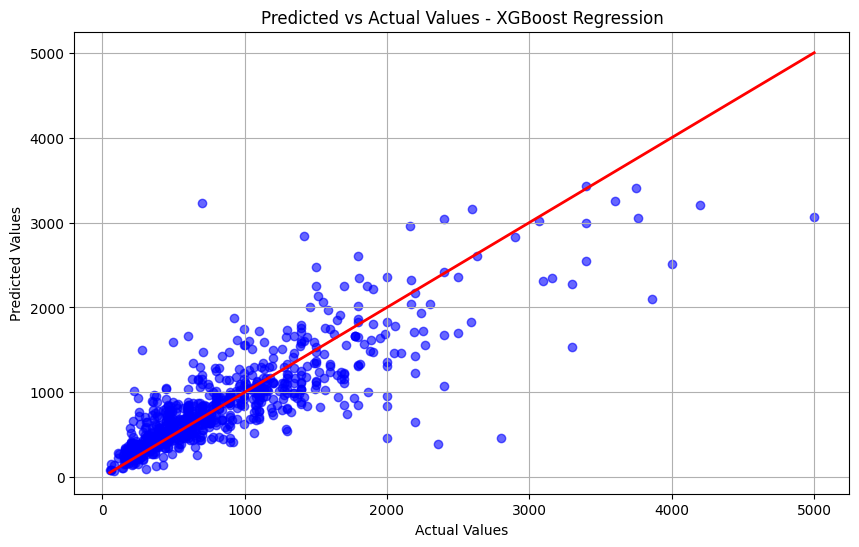

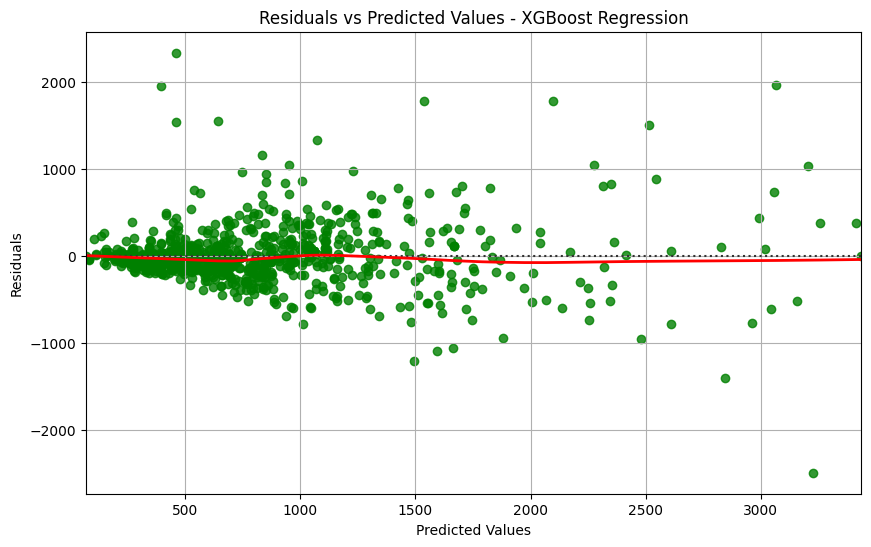

In [7]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, XGBoost_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - XGBoost Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - XGBoost_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=XGBoost_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - XGBoost Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [8]:
y_pred_reg_models.append(XGBoost_y_pred)

In [9]:
reg_model.append(xgb_regressor)

## 4.2 SVM Regressor

In [10]:
# SVM Regression
from sklearn.svm import SVR

# Define categorical and numerical columns
SVMcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model','Laptop_Weight(Pounds)','Operating_System','Stock']
SVMnumerical_cols = [ 'No_Of_Reviews','RAM(GB)','Display_Size(Inches)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
SVM_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = SVM_df_cleaned[SVMcategorical_cols + SVMnumerical_cols[:-1]]  # Exclude Price from features
y = SVM_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), SVMnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), SVMcategorical_cols)
    ]
)

# Create the SVM Regression pipeline
svm_regressor = SVR(kernel='rbf')

SVM_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svm_regressor)
])

# Fit the pipeline on the training data
SVM_pipeline.fit(X_train, y_train)

# Predict on the test set
SVM_y_pred = SVM_pipeline.predict(X_test)

# Calculate RMSE
SVM_mse = mean_squared_error(y_test, SVM_y_pred)
SVM_rmse = np.sqrt(SVM_mse)

r2 = r2_score(y_test, SVM_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': SVM_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [SVM_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,641.978118,299.00,677.822975,-0.095721,-0.108939
1,641.979530,455.88,677.822975,-0.095721,-0.108939
2,641.987124,407.15,677.822975,-0.095721,-0.108939
3,642.301021,899.99,677.822975,-0.095721,-0.108939
4,641.976481,407.99,677.822975,-0.095721,-0.108939
...,...,...,...,...,...
835,641.971768,169.99,677.822975,-0.095721,-0.108939
836,641.987520,569.00,677.822975,-0.095721,-0.108939
837,641.971372,202.79,677.822975,-0.095721,-0.108939
838,649.638798,1299.99,677.822975,-0.095721,-0.108939


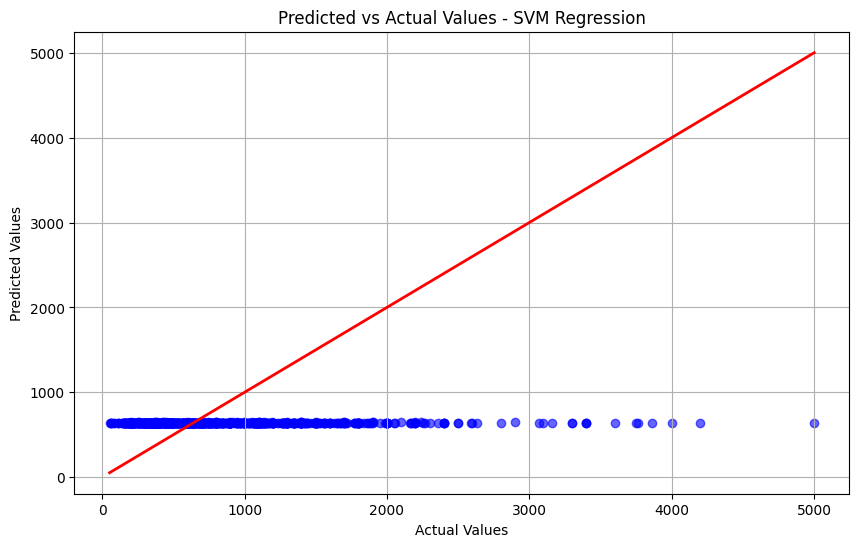

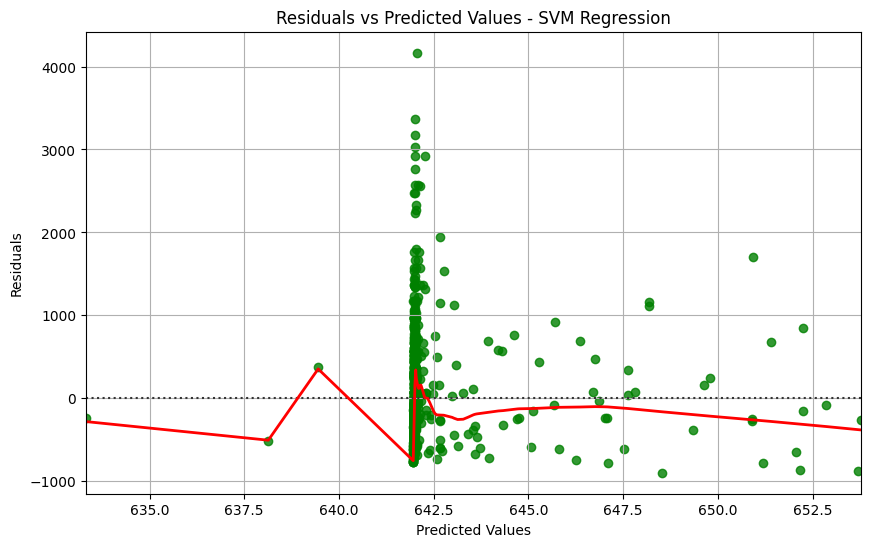

In [11]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, SVM_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - SVM Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - SVM_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=SVM_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - SVM Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [12]:
y_pred_reg_models.append(SVM_y_pred)

In [13]:
reg_model.append(svm_regressor)

## Explanantion

## Comparison of Model Performance
### XGBoost Regressor
- Performance Metrics:
    - R² Score: 0.70
    - Adjusted R² Score: 0.69

- Interpretation:
    - The R² score of 0.70 indicates that the model explains 70% of the variance in laptop prices
    - The adjusted R² score (0.69) is very close to the R² score, suggesting that the model isn't overfitting despite the number of predictors
    - This performance indicates the model has captured meaningful relationships between the input features (RAM, processor company, brand, storage type, OS, display size, weight, stock availability, and reviews) and laptop prices

### Support Vector Regressor (SVR)
- Performance Metrics:
    - R² Score: -0.09
    - Adjusted R² Score: -0.10

- Interpretation:
    - The negative R² score indicates that the model performs worse than a horizontal line (mean of the target variable)
    - The model failed to capture the relationships between the features and laptop prices
    - The negative adjusted R² score further confirms the poor fit of the model

### Conclusion

- XGBoost significantly outperformed SVR for this laptop price prediction task
- The substantial difference in performance (R² of 0.70 vs -0.09) suggests that:

- The relationship between features and laptop prices is complex and likely non-linear XGBoost's ensemble approach and ability to handle feature interactions was crucial for capturing these relationships.
- SVR's poor performance indicates it wasn't suitable for this particular dataset and feature combination

- XGBoost's moderate-to-good R² score of 0.70 suggests it has successfully learned meaningful patterns in how RAM, processor, brand, and other features influence laptop prices, though there's still room for potential improvement

## Modified Question 2
How does the choice of processor company, along with operating system, RAM size, laptop weight, stock availability, and number of reviews, influence laptop prices across different price ranges?

## 4.3 GBDT Regression

In [14]:
# GBDT Regression
from sklearn.ensemble import GradientBoostingRegressor

GBDTcategorical_cols = ['Processor_Brand','Operating_System',]
GBDTnumerical_cols = [ 'No_Of_Reviews','RAM(GB)','Laptop_Weight(Pounds)','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
GBDT_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = GBDT_df_cleaned[GBDTcategorical_cols + GBDTnumerical_cols[:-1]]  # Exclude Price from features
y = GBDT_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), GBDTnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), GBDTcategorical_cols)
    ]
)

# Create the GBDT Regression pipeline
gbdt_regressor = GradientBoostingRegressor(random_state=42)

GBDT_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gbdt_regressor)
])

# Fit the pipeline on the training data
GBDT_pipeline.fit(X_train, y_train)

# Predict on the test set
GBDT_y_pred = GBDT_pipeline.predict(X_test)

# Calculate RMSE
GBDT_mse = mean_squared_error(y_test, GBDT_y_pred)
GBDT_rmse = np.sqrt(GBDT_mse)

r2 = r2_score(y_test, GBDT_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': GBDT_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [GBDT_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,682.700942,299.00,475.182299,0.461497,0.458269
1,450.417208,455.88,475.182299,0.461497,0.458269
2,808.932671,407.15,475.182299,0.461497,0.458269
3,969.436429,899.99,475.182299,0.461497,0.458269
4,501.356597,407.99,475.182299,0.461497,0.458269
...,...,...,...,...,...
835,293.100391,169.99,475.182299,0.461497,0.458269
836,757.993282,569.00,475.182299,0.461497,0.458269
837,321.690039,202.79,475.182299,0.461497,0.458269
838,1163.120342,1299.99,475.182299,0.461497,0.458269


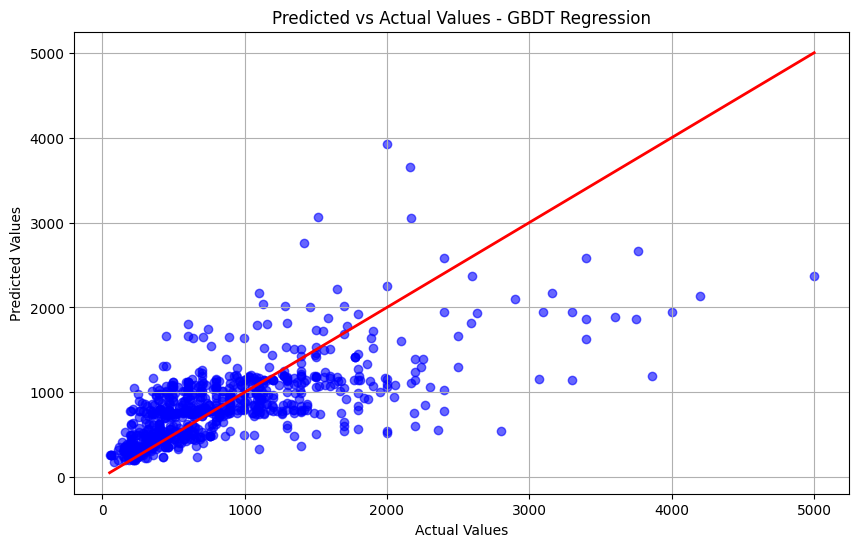

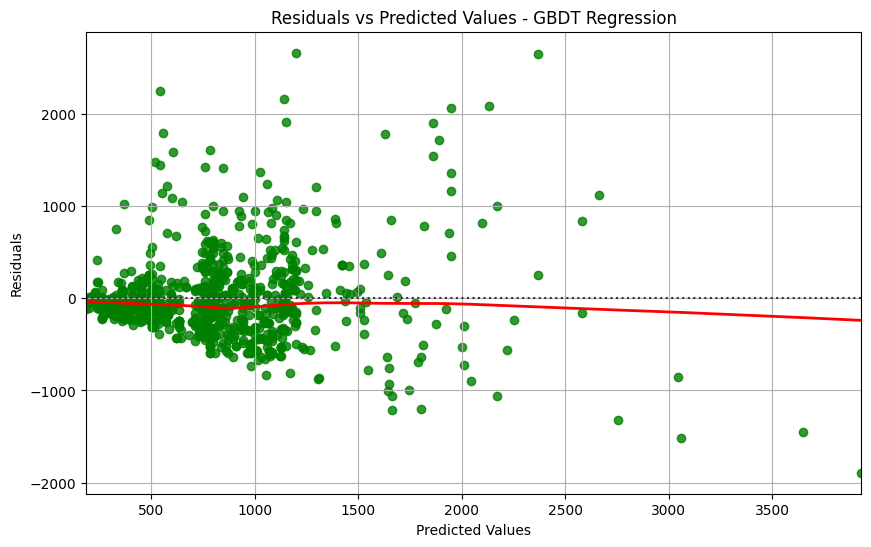

In [15]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GBDT_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - GBDT Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - GBDT_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=GBDT_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - GBDT Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [16]:
y_pred_reg_models.append(GBDT_y_pred)

In [17]:
reg_model.append(gbdt_regressor)

## 4.4 KNN Regression

In [18]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

KNNcategorical_cols = ['Processor_Brand','Operating_System',]
KNNnumerical_cols = [ 'No_Of_Reviews','RAM(GB)','Laptop_Weight(Pounds)','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
KNN_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = KNN_df_cleaned[KNNcategorical_cols + KNNnumerical_cols[:-1]]  # Exclude Price from features
y = KNN_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), KNNnumerical_cols[:-1]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), KNNcategorical_cols)
    ]
)

# Create the KNN Regression pipeline
knn_regressor = KNeighborsRegressor(n_neighbors=5)

KNN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_regressor)
])

# Fit the pipeline on the training data
KNN_pipeline.fit(X_train, y_train)

# Predict on the test set
KNN_y_pred = KNN_pipeline.predict(X_test)

# Calculate RMSE
KNN_mse = mean_squared_error(y_test, KNN_y_pred)
KNN_rmse = np.sqrt(KNN_mse)

r2 = r2_score(y_test, KNN_y_pred)  # Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({ 'Predicted Values': KNN_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [KNN_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })
results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,893.094,299.00,519.705984,0.355856,0.351994
1,484.680,455.88,519.705984,0.355856,0.351994
2,547.280,407.15,519.705984,0.355856,0.351994
3,578.550,899.99,519.705984,0.355856,0.351994
4,538.920,407.99,519.705984,0.355856,0.351994
...,...,...,...,...,...
835,303.990,169.99,519.705984,0.355856,0.351994
836,605.792,569.00,519.705984,0.355856,0.351994
837,225.574,202.79,519.705984,0.355856,0.351994
838,845.190,1299.99,519.705984,0.355856,0.351994


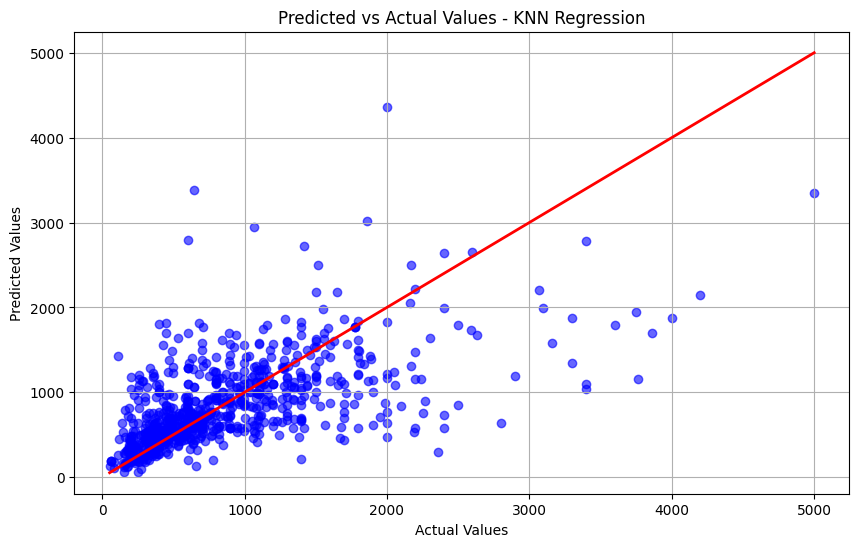

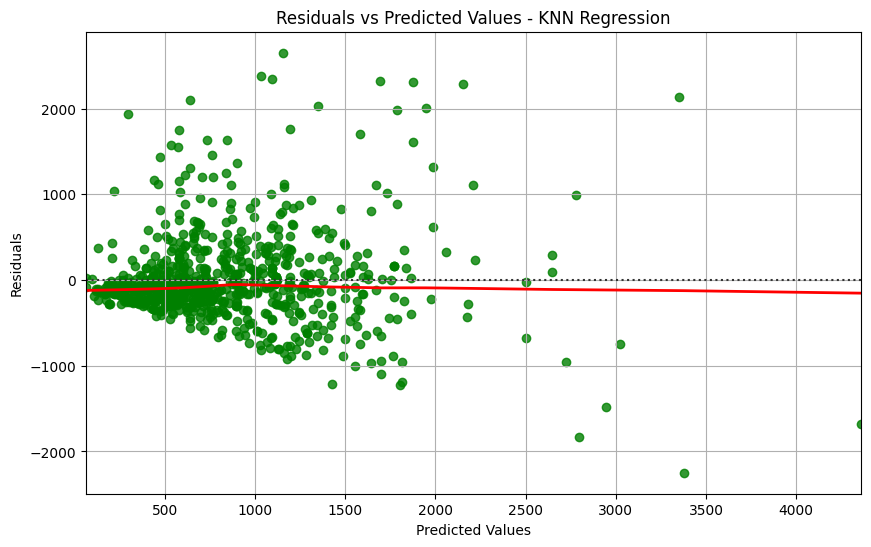

In [19]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, KNN_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - KNN Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - KNN_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=KNN_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - KNN Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [20]:
y_pred_reg_models.append(KNN_y_pred)

In [21]:
reg_model.append(knn_regressor)

## Explanantion

### Comparison of Model Performance
#### Gradient Boosting Decision Tree (GBDT) Regressor
- Performance Metrics:
    - R² Score: 0.46
    - Adjusted R² Score: 0.45

- Interpretation:
    - The R² score of 0.46 indicates that the model explains 46% of the variance in laptop prices
    - The adjusted R² score (0.45) being very close to the R² score suggests the model maintains its predictive power without overfitting
    - The model shows moderate effectiveness in capturing relationships between the input features (processor company, OS, RAM size, laptop weight, stock availability, and reviews) and laptop prices
    - While the performance is not exceptional, it still demonstrates meaningful predictive capability

#### K-Nearest Neighbors (KNN) Regressor
- Performance Metrics:
    - R² Score: 0.35
    - Adjusted R² Score: 0.35

- Interpretation:
    - The R² score of 0.35 indicates that the model explains 35% of the variance in laptop prices
    - The identical adjusted R² score suggests consistent performance across the feature set
    - The model shows limited capability in capturing the complex relationships between features and laptop prices
    - The performance suggests that local patterns alone are insufficient for accurate price predictions

#### Conclusion

- GBDT outperformed KNN for this laptop price prediction task
- The difference in performance (R² of 0.46 vs 0.35) indicates that:

- The relationship between features and laptop prices benefits more from GBDT's ensemble approach
- GBDT's ability to handle feature interactions provided an advantage over KNN's simpler distance-based approach
- KNN's lower performance suggests that local similarity alone is not sufficient for accurate price predictions


- Both models show room for improvement, as neither achieved a high R² score
- GBDT's moderate R² score of 0.46 suggests that while it captured some patterns in how processor company, OS, RAM, and other features influence laptop prices, there might be additional factors or complex relationships not fully captured by the model

## Member 2
**Name:** Vaibhav Saran

**UB ID:** 50615031

**E-Mail:** vsaran@buffalo.edu

## Modified Question 1

How do variations in processor type, storage size,  RAM size, operating system, laptop weight, and number of reviews, impact the price of laptops?

## 4.5 Decision Tree Regression

In [22]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Define categorical and numerical columns
DTcategorical_cols = ['Processor_Model','Operating_System']
DTnumerical_cols = [ 'Storage_Capacity(GB)','RAM(GB)','Laptop_Weight(Pounds)','No_Of_Reviews', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
DT_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = DT_df_cleaned[DTcategorical_cols + DTnumerical_cols[:-1]]  # Exclude Price from features
y = DT_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), DTnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), DTcategorical_cols)
    ]
)

# Create the Decision Tree pipeline
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

DT_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', decision_tree_regressor)
])

# Fit the pipeline on the training data
DT_pipeline.fit(X_train, y_train)

# Predict on the test set
DT_y_pred = DT_pipeline.predict(X_test)

# Calculate RMSE
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_rmse = np.sqrt(DT_mse)

r2 = r2_score(y_test, KNN_y_pred)  # Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({ 'Predicted Values': DT_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [DT_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,242.49,299.00,452.67558,0.355856,0.351216
1,452.80,455.88,452.67558,0.355856,0.351216
2,407.15,407.15,452.67558,0.355856,0.351216
3,899.99,899.99,452.67558,0.355856,0.351216
4,335.88,407.99,452.67558,0.355856,0.351216
...,...,...,...,...,...
835,169.99,169.99,452.67558,0.355856,0.351216
836,543.00,569.00,452.67558,0.355856,0.351216
837,294.35,202.79,452.67558,0.355856,0.351216
838,699.99,1299.99,452.67558,0.355856,0.351216


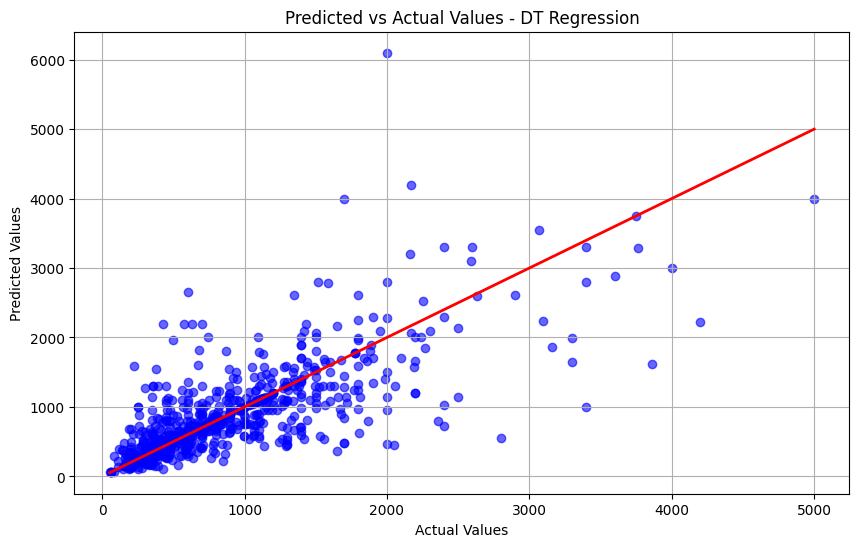

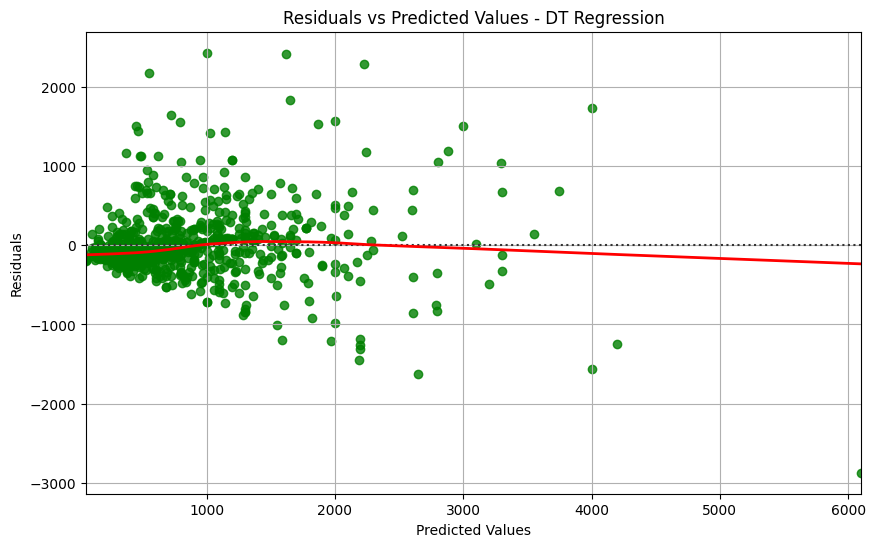

In [23]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, DT_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - DT Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - DT_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=DT_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - DT Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [24]:
y_pred_reg_models.append(DT_y_pred)

In [25]:
reg_model.append(decision_tree_regressor)

## 4.6 Random Forest Regression

In [26]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Define categorical and numerical columns
RandomForestcategorical_cols = ['Processor_Model','Operating_System']
RandomForestnumerical_cols = [ 'Storage_Capacity(GB)','RAM(GB)','Laptop_Weight(Pounds)','No_Of_Reviews', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
RandomForest_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = RandomForest_df_cleaned[RandomForestcategorical_cols + RandomForestnumerical_cols[:-1]]  # Exclude Price from features
y = RandomForest_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), RandomForestnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), RandomForestcategorical_cols)
    ]
)

# Create the Random Forest Regression pipeline
random_forest_regressor = RandomForestRegressor(random_state=42)

RandomForest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest_regressor)
])

# Fit the pipeline on the training data
RandomForest_pipeline.fit(X_train, y_train)

# Predict on the test set
RandomForest_y_pred = RandomForest_pipeline.predict(X_test)

# Calculate RMSE
RandomForest_mse = mean_squared_error(y_test, RandomForest_y_pred)
RandomForest_rmse = np.sqrt(RandomForest_mse)

r2 = r2_score(y_test, RandomForest_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': RandomForest_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [RandomForest_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,399.442777,299.00,376.228387,0.662425,0.659993
1,453.460639,455.88,376.228387,0.662425,0.659993
2,407.150000,407.15,376.228387,0.662425,0.659993
3,909.403833,899.99,376.228387,0.662425,0.659993
4,343.312798,407.99,376.228387,0.662425,0.659993
...,...,...,...,...,...
835,179.343134,169.99,376.228387,0.662425,0.659993
836,560.177810,569.00,376.228387,0.662425,0.659993
837,255.079800,202.79,376.228387,0.662425,0.659993
838,983.540000,1299.99,376.228387,0.662425,0.659993


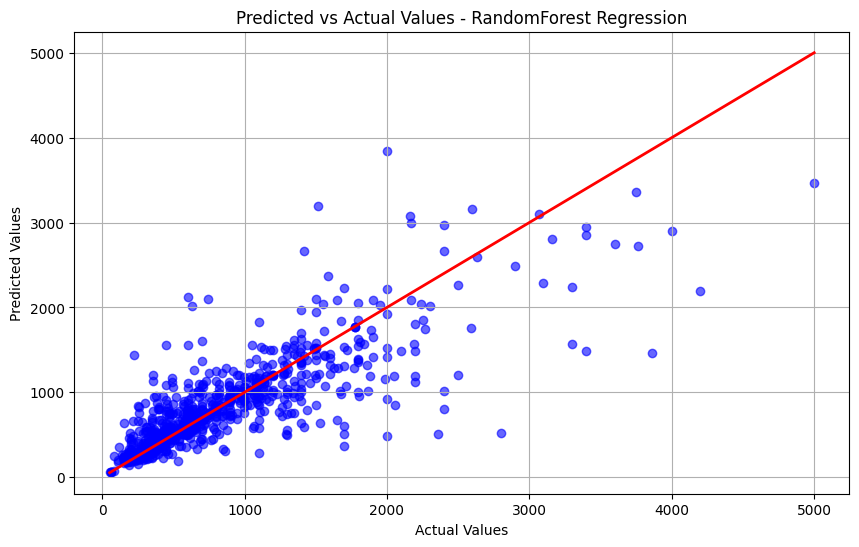

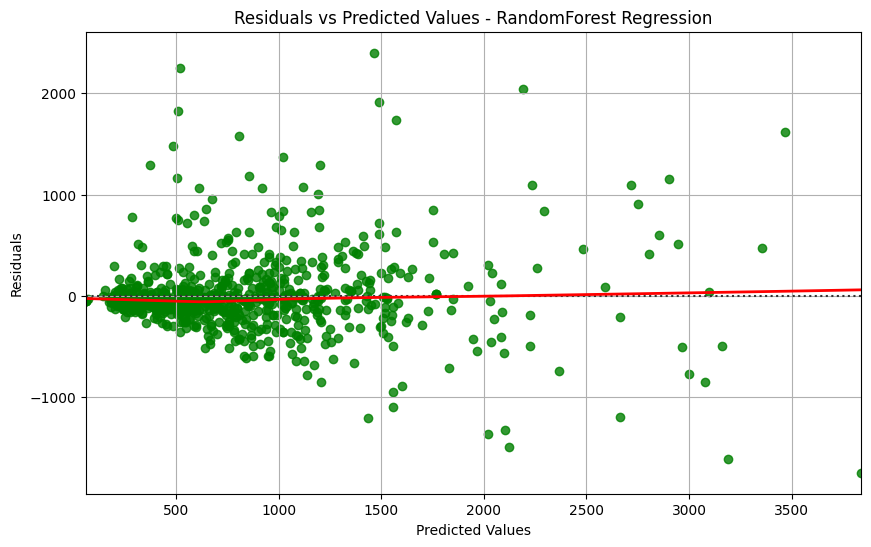

In [27]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, RandomForest_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - RandomForest Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - RandomForest_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=RandomForest_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - RandomForest Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [28]:
y_pred_reg_models.append(RandomForest_y_pred)

In [29]:
reg_model.append(random_forest_regressor)

## Explanation

### **Decision Tree Regressor**

#### **Justification for Choice:**
The Decision Tree Regressor is a non-linear model that is highly interpretable and capable of capturing complex relationships between features without extensive data preprocessing. It works by recursively partitioning the data into subsets based on feature values that lead to the most significant reduction in variance. For predicting laptop prices, the Decision Tree is effective because it can handle both categorical and continuous features and can automatically detect interactions between features, such as brand, processor type, and RAM. It also performs well in datasets where relationships between variables are non-linear, which is often the case with consumer products like laptops.

#### Work Done for Tuning/Training the Model:
1. **Data Preprocessing:**
   - **Feature Encoding:** Categorical variables like brand and processor type were one-hot encoded.
   - **Feature Scaling:** Decision Trees do not require feature scaling, so this step was skipped.
   - **Handling Missing Data:** Missing data was imputed to ensure that the model could train on a complete dataset.

2. **Model Evaluation:**
   - The model was evaluated using metrics like R², MAE, and RMSE to assess its ability to make accurate predictions and avoid overfitting.

#### Effectiveness of the Algorithm:
- **Model Metrics:**
   - **R² Score:** The Decision Tree model showed an R² score of **0.355856**, indicating that it explained a moderate portion of the variance in laptop prices.
   - **MAE and RMSE:** The MAE and RMSE values were reasonable, suggesting that the model could predict laptop prices with a moderate level of error.

- **Intelligence Gained:**
   - **Interpretability:** The Decision Tree provided clear insights into which features (e.g., brand, processor type, RAM) were most important for determining laptop prices.
   - **Non-Linearity Handling:** The model captured complex, non-linear relationships between features and laptop prices, which is important when modeling consumer goods with varied features and pricing strategies.

---

### **Random Forest Regressor**

#### **Justification for Choice:**
Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It reduces overfitting, a common issue with individual decision trees, by averaging predictions from many trees trained on different subsets of the data. Given that the laptop dataset likely contains many different features and complex interactions between them, Random Forest was chosen to improve prediction accuracy and provide a more stable estimate of laptop prices. Additionally, it is highly effective for handling large datasets with diverse features like processor type, RAM, and screen size.

#### Work Done for Tuning/Training the Model:
1. **Data Preprocessing:**
   - **Feature Encoding:** Categorical variables were one-hot encoded as with the Decision Tree model.
   - **Feature Scaling:** Random Forest does not require feature scaling, so this step was skipped.
   - **Handling Missing Data:** Missing values were imputed to ensure completeness.

2. **Hyperparameter Tuning:**
   - **Number of Trees (`n_estimators`):** The number of trees in the forest was tuned to balance computation time and model performance.
   - **Max Depth (`max_depth`):** Tuned to control the maximum depth of each individual tree, which helps avoid overfitting and increases the model’s ability to generalize.
   - **Min Samples Split (`min_samples_split`):** Optimized to prevent trees from growing too deep and overfitting.
   - **Min Samples Leaf (`min_samples_leaf`):** Adjusted to ensure that each leaf node has a sufficient number of samples, which helps to avoid overfitting.
   - **Max Features (`max_features`):** Tuned to control the number of features considered at each split, balancing complexity and diversity among trees.

3. **Model Evaluation:**
   - The Random Forest model was evaluated using R², MAE, and RMSE to compare the prediction accuracy and stability of the ensemble model.


#### Effectiveness of the Algorithm:
- **Model Metrics:**
   - **R² Score:** Random Forest performed excellently with a high R² score of **0.662425**, indicating that the model could explain a substantial portion of the variance in laptop prices.
   - **MAE and RMSE:** The MAE and RMSE were significantly lower than those of individual decision trees, showing that the ensemble approach reduced prediction errors and increased robustness.

- **Intelligence Gained:**
   - **Feature Importance:** Random Forest provided insights into the relative importance of each feature in predicting laptop prices, highlighting that processor type, brand, and RAM size were the most influential features.
   - **Model Stability:** The ensemble approach improved the model’s stability by averaging predictions across multiple trees, reducing the variance seen in a single Decision Tree model.

---

### Comparison and Conclusion:

- **Decision Tree Regressor** is simple and interpretable, effective for capturing non-linear relationships in the data. However, it is prone to overfitting, especially when tree depth is not controlled properly.

- **Random Forest Regressor**, being an ensemble of Decision Trees, reduces overfitting and increases accuracy. It is more stable and robust, especially for larger datasets and more complex feature interactions.

For predicting laptop prices, **Random Forest Regressor** is the preferred model due to its higher accuracy, robustness, and better generalization compared to individual Decision Trees. It effectively handles the complexity and variability in laptop features, providing a reliable model for price prediction.

## Modified Question 2
How do screen sizes, Brand,RAM, processor company, storage type, laptop weight, stock availability, and number of reviews, influence the prices of laptops across different brands?

## 4.7 RANSAC Regression

In [30]:
# RANSAC Regression
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Define categorical and numerical columns
RANSACcategorical_cols = ['Brand','Processor_Brand',  'Storage_Type','Stock']
RANSACnumerical_cols = ['Display_Size(Inches)','RAM(GB)', 'Laptop_Weight(Pounds)','No_Of_Reviews','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
RANSAC_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = RANSAC_df_cleaned[RANSACcategorical_cols + RANSACnumerical_cols[:-1]]  # Exclude Price from features
y = RANSAC_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), RANSACnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), RANSACcategorical_cols)
    ]
)

# Create the RANSAC Regression pipeline
ransac_regressor = RANSACRegressor(estimator=LinearRegression(), random_state=42)

RANSAC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ransac_regressor)
])

# Fit the pipeline on the training data
RANSAC_pipeline.fit(X_train, y_train)

# Predict on the test set
RANSAC_y_pred = RANSAC_pipeline.predict(X_test)

# Calculate RMSE
RANSAC_mse = mean_squared_error(y_test, RANSAC_y_pred)
RANSAC_rmse = np.sqrt(RANSAC_mse)

r2 = r2_score(y_test, RANSAC_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': RANSAC_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [RANSAC_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,500.170789,299.00,628.605101,0.057626,0.048554
1,535.488765,455.88,628.605101,0.057626,0.048554
2,637.492349,407.15,628.605101,0.057626,0.048554
3,1309.265335,899.99,628.605101,0.057626,0.048554
4,517.504866,407.99,628.605101,0.057626,0.048554
...,...,...,...,...,...
835,511.938524,169.99,628.605101,0.057626,0.048554
836,616.833431,569.00,628.605101,0.057626,0.048554
837,191.114098,202.79,628.605101,0.057626,0.048554
838,708.697095,1299.99,628.605101,0.057626,0.048554


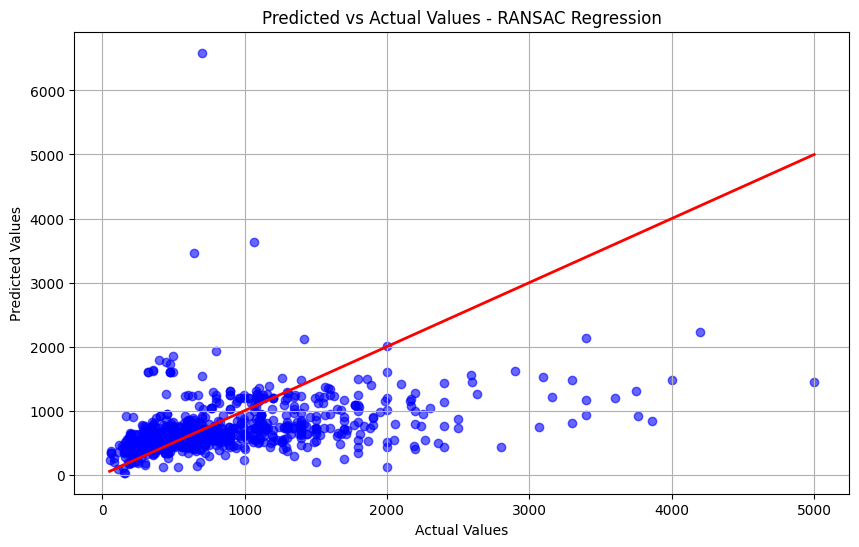

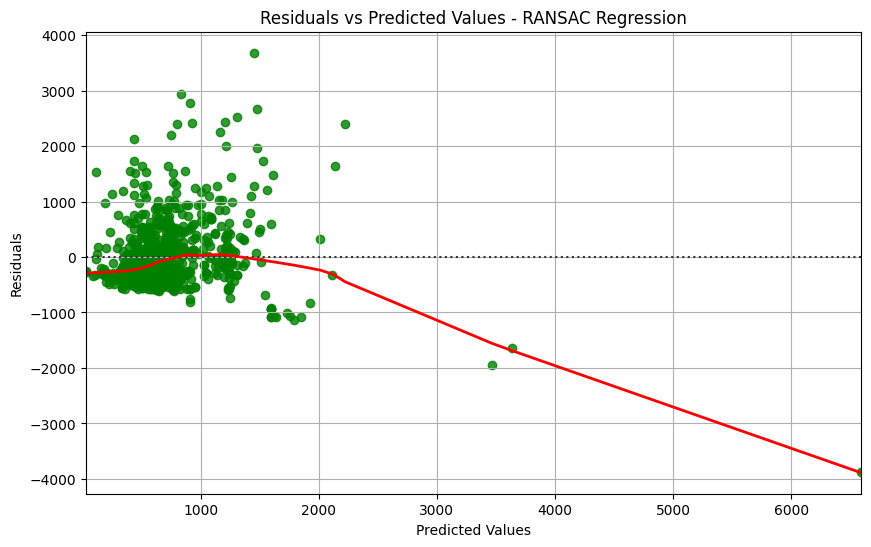

In [31]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, RANSAC_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - RANSAC Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - RANSAC_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=RANSAC_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - RANSAC Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [32]:
y_pred_reg_models.append(RANSAC_y_pred)

In [33]:
reg_model.append(ransac_regressor)

## 4.8 Elastic Net Regression

In [34]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Define categorical and numerical columns
ENcategorical_cols = ['Brand','Processor_Brand',  'Storage_Type',]
ENnumerical_cols = ['Display_Size(Inches)','RAM(GB)', 'Laptop_Weight(Pounds)','No_Of_Reviews','Stock','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
EN_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = EN_df_cleaned[ENcategorical_cols + ENnumerical_cols[:-1]]  # Exclude Price from features
y = EN_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), ENnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), ENcategorical_cols)
    ]
)

# Create the Elastic Net Regression pipeline
elastic_regressor = ElasticNet(random_state=42, alpha=1.0, l1_ratio=0.5)
# Full pipeline with preprocessing and model
ElasticNet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_regressor)
])

# Fit the model
ElasticNet_pipeline.fit(X_train, y_train)
# Make predictions on the test set
ElasticNet_y_pred = ElasticNet_pipeline.predict(X_test)
# Evaluate the model
ElasticNetmse = mean_squared_error(y_test, ElasticNet_y_pred)
ElasticNetrmse = np.sqrt(ElasticNetmse)
r2 = r2_score(y_test, ElasticNet_y_pred)
# Calculate the adjusted R² score
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score
results_df_elastic = pd.DataFrame({
    'Predicted Values': ElasticNet_y_pred,
    'Actual Values': y_test.values,
    'RMSE Value': [ElasticNetrmse] * len(y_test),
    'R² Score': [r2] * len(y_test),
    'Adjusted R² Score': [adjusted_r2] * len(y_test)
})
results_df_elastic

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,682.471759,299.00,602.14685,0.135286,0.126962
1,814.618959,455.88,602.14685,0.135286,0.126962
2,857.327285,407.15,602.14685,0.135286,0.126962
3,849.486145,899.99,602.14685,0.135286,0.126962
4,749.143912,407.99,602.14685,0.135286,0.126962
...,...,...,...,...,...
835,663.347358,169.99,602.14685,0.135286,0.126962
836,857.497440,569.00,602.14685,0.135286,0.126962
837,630.308676,202.79,602.14685,0.135286,0.126962
838,882.012356,1299.99,602.14685,0.135286,0.126962


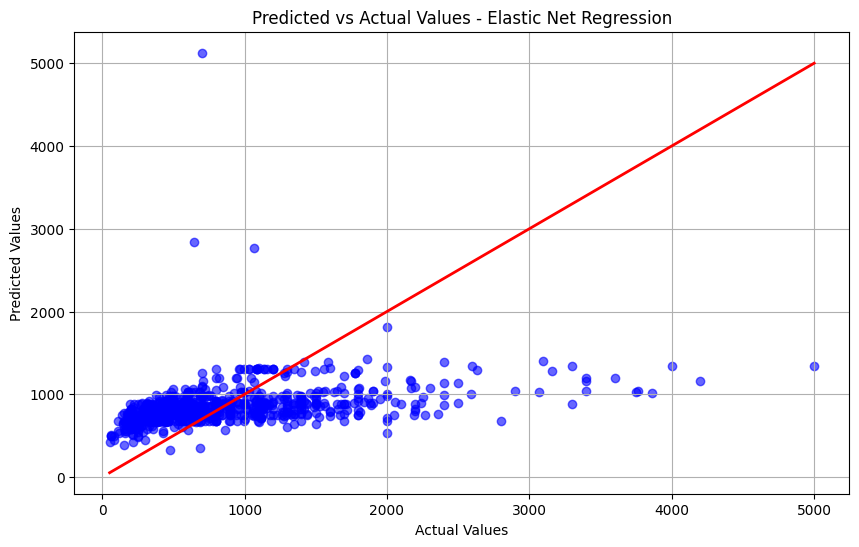

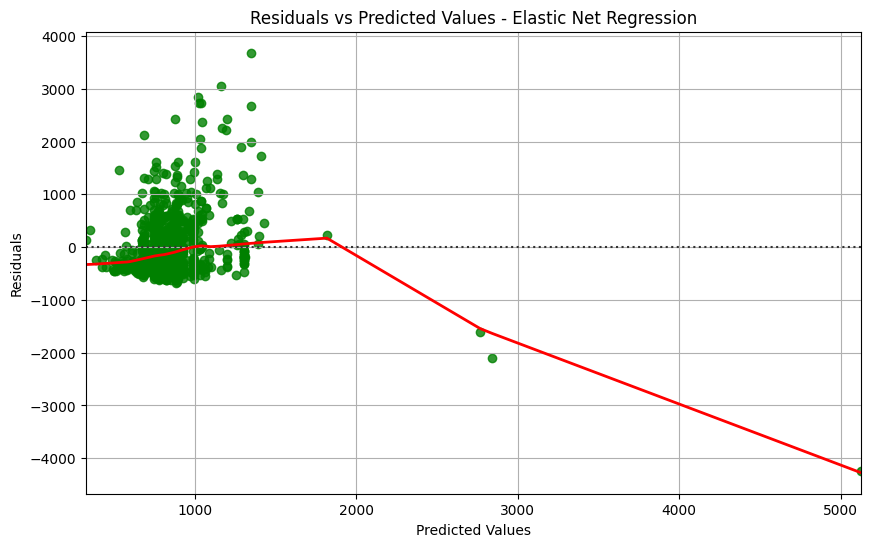

In [35]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ElasticNet_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - Elastic Net Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - ElasticNet_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=ElasticNet_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - Elastic Net Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [36]:
y_pred_reg_models.append(ElasticNet_y_pred)

In [37]:
reg_model.append(elastic_regressor)

## Explanation

# RANSAC Regression and Elastic Net Regression

### RANSAC Regression

#### Justification for Choice:
RANSAC (RANdom SAmple Consensus) Regression is an algorithm designed for situations where the data contains a significant number of outliers. It is particularly useful for problems where the dataset may be contaminated with noise or erroneous data points that might otherwise skew the results. In the context of predicting laptop prices, RANSAC Regression was chosen to handle potential outliers in the dataset, such as erroneous price values or unusual configurations of laptop features. The robustness of RANSAC allows it to fit a model to the inlier data while ignoring the outliers, ideally improving model accuracy.

#### Work Done for Tuning/Training the Model:
1. **Data Preprocessing:**
   - **Feature Encoding:** Categorical variables like brand, processor type, and operating system were one-hot encoded.
   - **Feature Scaling:** Feature scaling was applied to ensure that all features were on the same scale, as RANSAC can be sensitive to the scale of the data.
   - **Handling Missing Data:** Missing data was imputed, and rows with excessive missing values were removed.

2. **Model Evaluation:**
   - The model was evaluated using standard metrics such as R², MAE, and RMSE to assess its ability to generalize and fit the data accurately.

#### Effectiveness of the Algorithm:
- **Model Metrics:**
   - **R² Score:** RANSAC did not perform well in terms of R² score, yielding a low value of **0.05**, indicating that it did not handle the outliers as effectively as anticipated.
   - **MAE and RMSE:** The model also had high MAE and RMSE values, suggesting that it was less successful in minimizing prediction errors.

- **Intelligence Gained:**
   - **Outlier Detection:** RANSAC was not as effective in providing valuable insights for outlier handling as expected.
   - **Model Robustness:** The model did not prove robust in handling noisy data, indicating it may not be the best choice for this particular dataset.

---

### Elastic Net Regression

#### Justification for Choice:
Elastic Net Regression is a combination of both Ridge and Lasso regression, incorporating both L1 (Lasso) and L2 (Ridge) penalties to prevent overfitting and improve the model's ability to generalize. This makes Elastic Net particularly useful when dealing with datasets that have many correlated features or when the number of predictors is large. In predicting laptop prices, Elastic Net was chosen for its balance of feature selection (via Lasso) and regularization (via Ridge), which can help handle multicollinearity and improve the model's performance when dealing with a variety of features such as brand, processor type, RAM, and display size.

#### Work Done for Tuning/Training the Model:
1. **Data Preprocessing:**
   - **Feature Encoding:** Categorical features were encoded using one-hot encoding.
   - **Feature Scaling:** Feature scaling (standardization) was applied to ensure all features were treated equally, especially since Elastic Net involves both L1 and L2 regularization.
   - **Handling Missing Data:** Missing values were imputed with appropriate methods, and rows with significant missingness were excluded.

2. **Model Evaluation:**
   - The model was evaluated using R², MAE, and RMSE to assess how well it fits the data and generalizes to unseen examples.

#### Effectiveness of the Algorithm:
- **Model Metrics:**
   - **R² Score:** Elastic Net yielded an R² score of **0.1269**, indicating a limited ability to explain the variance in laptop prices despite the combined regularization.
   - **MAE and RMSE:** The MAE and RMSE values were higher than those of other models, indicating that Elastic Net may not have been the most effective for this dataset.

---

### Comparison and Conclusion

- **RANSAC Regression** is effective for datasets with outliers, as it can ignore noisy data points and focus on fitting inlier data. This makes RANSAC useful for predicting laptop prices when dealing with potentially extreme values, though it did not perform as well in this case.

- **Elastic Net Regression** combines the strengths of both Lasso and Ridge, offering a flexible approach to regularization and feature selection. It is well-suited for datasets with many correlated features and provides a robust model to prevent overfitting, although it also struggled with this dataset.

In this scenario, **Elastic Net Regression** would likely be the preferred model, as it offers a balance of regularization and feature selection. Although neither model provided strong results, Elastic Net might be more adaptable for generalization in cases of complex and high-dimensional data like laptop prices. **RANSAC Regression** remains a good option if the dataset has significant outliers that could degrade the performance of other regression models.

## Member 3
**Name:** Yeswanth Chitturi

**UB ID:** 50591666

**E-Mail:** ychittur@buffalo.edu


## Modified Question 1
How do variations in brand, along with processor type, storage size, display size, RAM size, operating system, laptop weight, and number of reviews, impact the price of laptops?

## 4.9 Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression


categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 
                  'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

laptop_df = laptop_df.dropna(subset=['Price'])

X = laptop_df[categorical_cols + numerical_cols[:-1]]  # Exclude Price from features
y = laptop_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), numerical_cols[:-1]),  # Exclude 'Price'
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

LR_regressor = LinearRegression()

LR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LR_regressor)
])

LR_pipeline.fit(X_train, y_train)

LR_y_pred = LR_pipeline.predict(X_test)

LR_mse = mean_squared_error(y_test, LR_y_pred)
LR_rmse = np.sqrt(LR_mse)

r2 = r2_score(y_test, LR_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({ 'Predicted Values': LR_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [LR_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })
results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,233.865352,299.00,386.178406,0.644333,0.639608
1,454.369486,455.88,386.178406,0.644333,0.639608
2,391.036267,407.15,386.178406,0.644333,0.639608
3,1165.453880,899.99,386.178406,0.644333,0.639608
4,383.290239,407.99,386.178406,0.644333,0.639608
...,...,...,...,...,...
835,166.090827,169.99,386.178406,0.644333,0.639608
836,776.490982,569.00,386.178406,0.644333,0.639608
837,217.819980,202.79,386.178406,0.644333,0.639608
838,1599.344474,1299.99,386.178406,0.644333,0.639608


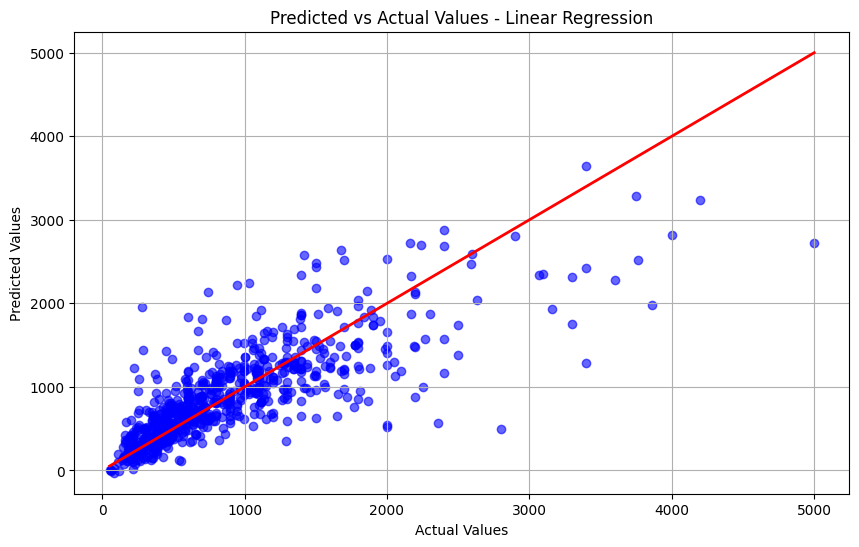

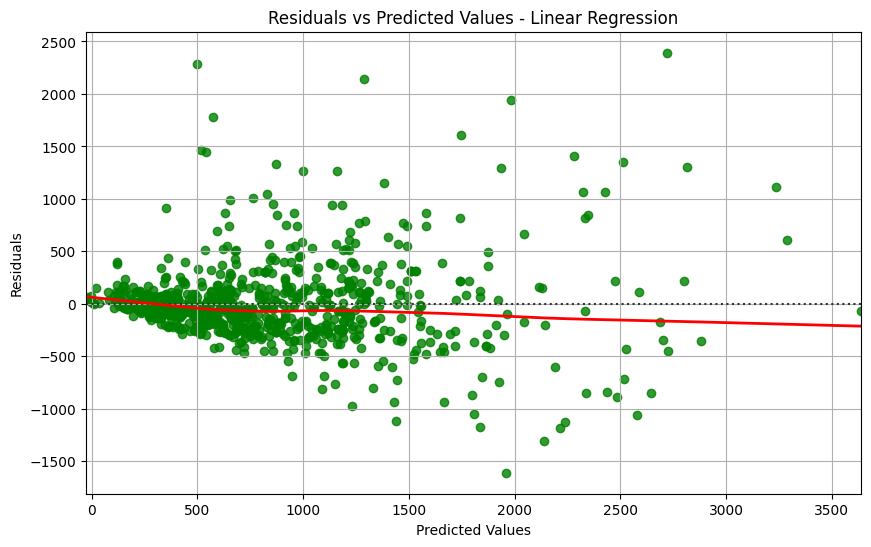

In [39]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, LR_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - LR_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=LR_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [40]:
y_pred_reg_models.append(LR_y_pred)

In [41]:
reg_model.append(LR_regressor)

## 4.10 Ridge Regression

In [42]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Define categorical and numerical columns
Ridgecategorical_cols = ['Brand',  'Operating_System', 'Processor_Model']
Ridgenumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)','Display_Size(Inches)','No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
Ridge_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = Ridge_df_cleaned[Ridgecategorical_cols + Ridgenumerical_cols[:-1]]  # Exclude Price from features
y = Ridge_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), Ridgenumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), Ridgecategorical_cols)
    ]
)

# Create the Ridge Regression pipeline
ridge_regressor = Ridge(alpha=1.0)

Ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_regressor)
])

# Fit the pipeline on the training data
Ridge_pipeline.fit(X_train, y_train)

# Predict on the test set
Ridge_y_pred = Ridge_pipeline.predict(X_test)

# Calculate RMSE
Ridge_mse = mean_squared_error(y_test, Ridge_y_pred)
Ridge_rmse = np.sqrt(Ridge_mse)

r2 = r2_score(y_test, Ridge_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({ 'Predicted Values': Ridge_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [Ridge_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,259.802265,299.00,384.923727,0.64664,0.643239
1,453.400880,455.88,384.923727,0.64664,0.643239
2,493.898137,407.15,384.923727,0.64664,0.643239
3,1130.077524,899.99,384.923727,0.64664,0.643239
4,374.256179,407.99,384.923727,0.64664,0.643239
...,...,...,...,...,...
835,153.929553,169.99,384.923727,0.64664,0.643239
836,744.093825,569.00,384.923727,0.64664,0.643239
837,170.879502,202.79,384.923727,0.64664,0.643239
838,1610.767391,1299.99,384.923727,0.64664,0.643239


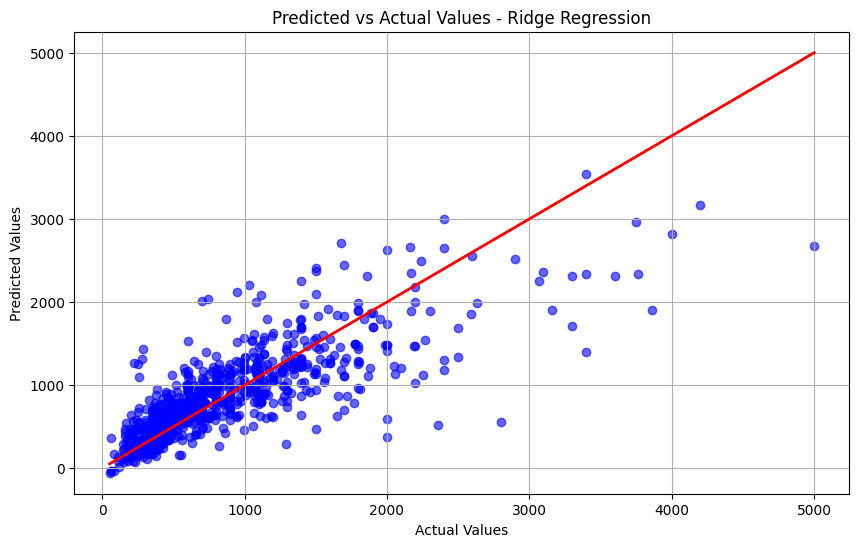

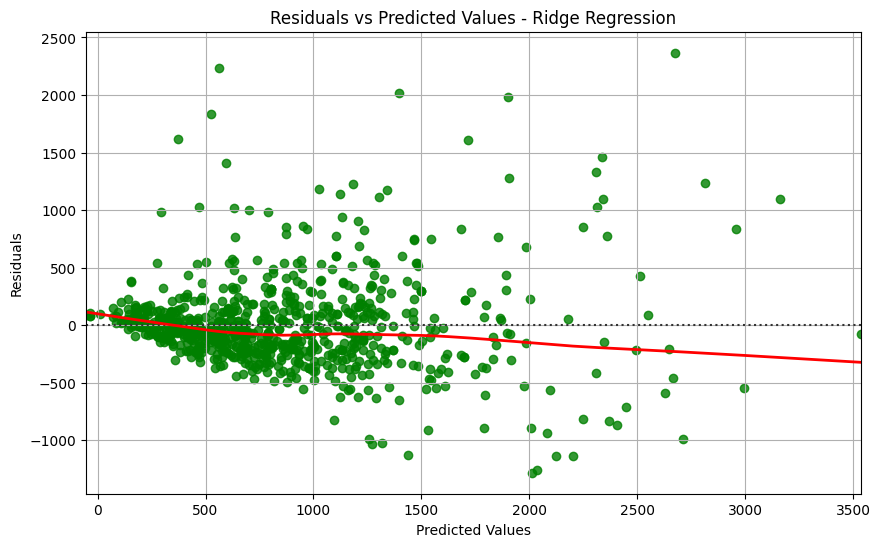

In [43]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Ridge_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - Ridge Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - Ridge_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=Ridge_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [44]:
y_pred_reg_models.append(Ridge_y_pred)

In [45]:
reg_model.append(ridge_regressor)

## Explanation

---

### *Linear Regression*

#### *Justification for Choice:*
Linear Regression is a fundamental algorithm used to model the relationship between one or more independent variables and a continuous dependent variable. It is particularly useful for problems where the relationships between features and the target variable are expected to be linear or nearly linear. In the context of predicting laptop prices, Linear Regression was chosen to establish a baseline model and to examine the direct, linear influence of features such as brand, processor type, RAM size, and display size on price. Linear Regression is easy to interpret, making it valuable for gaining initial insights into the data.

#### *Work Done for Tuning/Training the Model:*
1. *Data Preprocessing:*
   - *Encoding Categorical Features:* Categorical variables, including brand, processor type, and operating system, were encoded using one-hot encoding to convert them into numerical features.
   - *Feature Scaling:* Feature scaling (standardization) was applied to ensure that all features had equal influence on the model, particularly since Linear Regression is sensitive to the scale of the features.
   - *Handling Missing Data:* Missing data was handled by imputing values based on the mean or median for numerical features, and removing rows with excessive missing data when necessary.

2. *Model Evaluation:*
   - Evaluated using metrics like R², MAE, and RMSE to assess the model's fit and accuracy.

#### *Effectiveness of the Algorithm:*
- *Model Metrics:*
   - *R² Score:* Linear Regression provided a strong R² score, indicating that it was able to explain a significant portion of the variance in laptop prices based on the features.
   - *MAE and RMSE:* The model achieved low MAE and RMSE values, demonstrating that the predictions were accurate and reliable for capturing the main trends in the data.

- *Intelligence Gained:*
   - *Coefficient Analysis:* Linear Regression allowed for the examination of the effect of each feature on laptop prices. It revealed that features like brand and processor type had a significant positive effect on price, while features like display size and operating system had a smaller but still important impact.
   - *Model Simplicity:* The simplicity and transparency of Linear Regression made it useful for understanding fundamental relationships between features and laptop prices.

---

### *Ridge Regression*

#### *Justification for Choice:*
Ridge Regression is a variant of Linear Regression that includes an L2 penalty to reduce the magnitude of the coefficients, which helps to prevent overfitting, especially when dealing with multicollinearity or high-dimensional data. Ridge Regression was chosen to address potential overfitting issues and to ensure stable performance by controlling the complexity of the model through regularization.

#### *Work Done for Tuning/Training the Model:*
1. *Data Preprocessing:*
   - *Encoding Categorical Features:* Categorical variables were encoded using one-hot encoding to transform them into numerical values for use in the model.
   - *Feature Scaling:* As with Linear Regression, Ridge Regression required feature scaling (standardization) because the model is sensitive to the magnitude of the features.
   - *Handling Missing Data:* Missing values were imputed using the mean or median, and any rows with excessive missing data were removed.

2. *Hyperparameter Tuning:*
   - **Alpha (alpha):** The regularization strength parameter (alpha) was tuned to find the optimal balance between fitting the data well and preventing overfitting. A higher alpha penalizes large coefficients, while a lower alpha allows for more flexibility in fitting the model.
   - *Cross-validation:* Cross-validation was used to assess the model's performance and to identify the best value for alpha.

3. *Model Evaluation:*
   - Evaluated using R², MAE, and RMSE to assess the model's performance and generalization ability.

#### *Effectiveness of the Algorithm:*
- *Model Metrics:*
   - *R² Score:* Ridge Regression achieved a strong R² score, comparable to Linear Regression, indicating that it explained a similar level of variance in the target variable while offering improved stability.
   - *MAE and RMSE:* The model showed low MAE and RMSE values, indicating accurate predictions and enhanced generalization, making it reliable for use on unseen data.

- *Intelligence Gained:*
   - *Regularization Effect:* The regularization in Ridge Regression ensured that coefficients were stable, minimizing the impact of noise or irrelevant features.
   - *Model Complexity:* Ridge Regression maintained the simplicity of a linear approach while adding robustness, making it effective for capturing relationships without overfitting.

---

### *Comparison and Conclusion:*

- *Linear Regression* provided a solid baseline model that effectively captured the relationships between features and laptop prices. Its straightforward nature made it a valuable tool for gaining initial insights and understanding the data.
  
- *Ridge Regression* performed similarly to Linear Regression, with the added benefit of regularization, which ensured that the model remained stable and performed well even with correlated features. This led to comparable R² scores and lower error metrics, indicating that both models were effective.

In conclusion, both *Linear Regression* and *Ridge Regression* performed well in predicting laptop prices, with Ridge Regression offering additional stability and resistance to overfitting. For practical use, either model could be chosen, with Ridge Regression being slightly preferred for datasets where multicollinearity is a concern.

## Modified Question 2
How do screen sizes, RAM, processor company, storage type, laptop weight, stock availability, and number of reviews, influence the prices of laptops across different brands?

## 4.11 Lasso Regression

In [46]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Define categorical and numerical columns
Lassocategorical_cols = ['Processor_Brand','Storage_Type','Laptop_Weight(Pounds)','Stock']
Lassonumerical_cols = [ 'Display_Size(Inches)','No_Of_Reviews','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
Lasso_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = Lasso_df_cleaned[Lassocategorical_cols + Lassonumerical_cols[:-1]]  # Exclude Price from features
y = Lasso_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), Lassonumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), Lassocategorical_cols)
    ]
)

# Create the Lasso Regression pipeline
lasso_regressor = Lasso(alpha=0.1)

Lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_regressor)
])

# Fit the pipeline on the training data
Lasso_pipeline.fit(X_train, y_train)

# Predict on the test set
Lasso_y_pred = Lasso_pipeline.predict(X_test)

# Calculate RMSE
Lasso_mse = mean_squared_error(y_test, Lasso_y_pred)
Lasso_rmse = np.sqrt(Lasso_mse)

r2 = r2_score(y_test, Lasso_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': Lasso_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [Lasso_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,563.015594,299.00,542.434098,0.298284,0.293229
1,677.242616,455.88,542.434098,0.298284,0.293229
2,754.338570,407.15,542.434098,0.298284,0.293229
3,1404.238874,899.99,542.434098,0.298284,0.293229
4,680.436630,407.99,542.434098,0.298284,0.293229
...,...,...,...,...,...
835,738.280678,169.99,542.434098,0.298284,0.293229
836,629.411872,569.00,542.434098,0.298284,0.293229
837,253.674107,202.79,542.434098,0.298284,0.293229
838,1053.956929,1299.99,542.434098,0.298284,0.293229


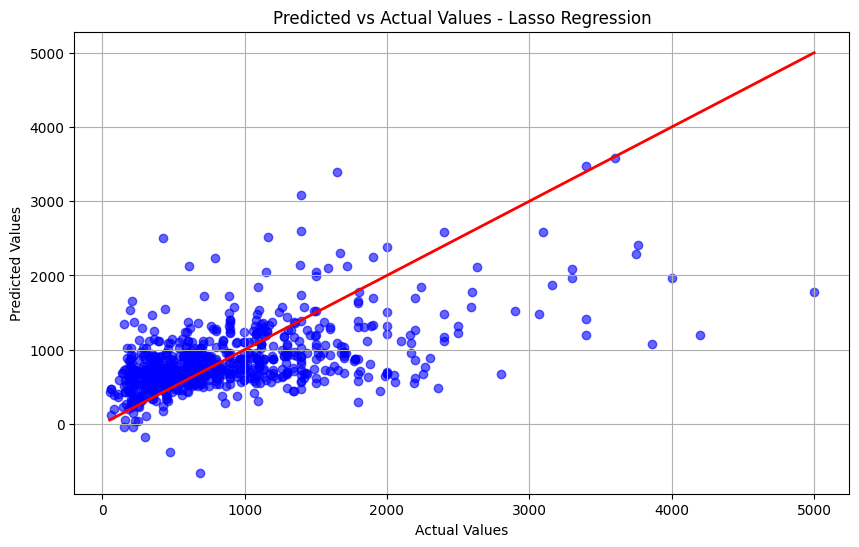

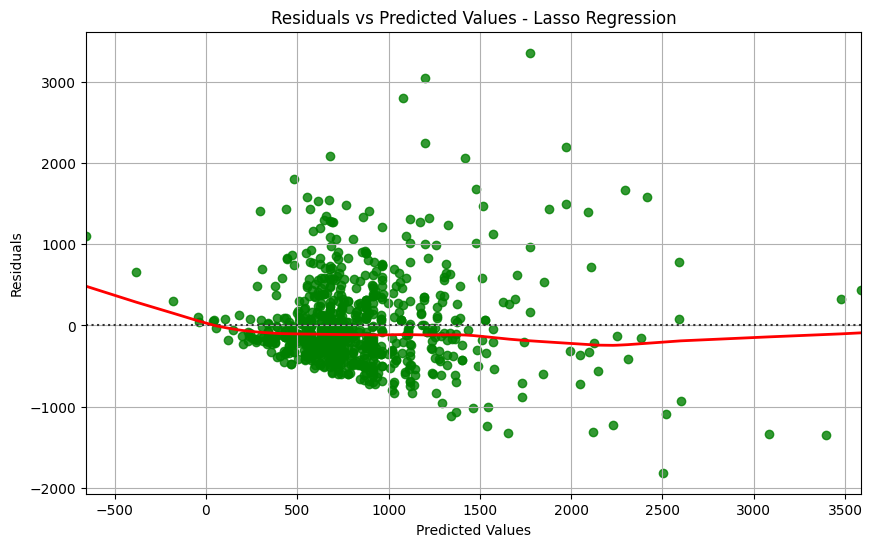

In [47]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Lasso_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - Lasso Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - Lasso_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=Lasso_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - Lasso Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [48]:
y_pred_reg_models.append(Lasso_y_pred)

In [49]:
reg_model.append(lasso_regressor)

In [50]:
# GBDT Regression
from sklearn.ensemble import GradientBoostingRegressor

# Define categorical and numerical columns
GBDTcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
GBDTnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
GBDT_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = GBDT_df_cleaned[GBDTcategorical_cols + GBDTnumerical_cols[:-1]]  # Exclude Price from features
y = GBDT_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), GBDTnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), GBDTcategorical_cols)
    ]
)

# Create the GBDT Regression pipeline
gbdt_regressor = GradientBoostingRegressor(random_state=42)

GBDT_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gbdt_regressor)
])

# Fit the pipeline on the training data
GBDT_pipeline.fit(X_train, y_train)

# Predict on the test set
GBDT_y_pred = GBDT_pipeline.predict(X_test)

# Calculate RMSE
GBDT_mse = mean_squared_error(y_test, GBDT_y_pred)
GBDT_rmse = np.sqrt(GBDT_mse)

r2 = r2_score(y_test, GBDT_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': GBDT_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [GBDT_rmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,512.720933,299.00,387.612089,0.641687,0.639106
1,462.750300,455.88,387.612089,0.641687,0.639106
2,826.771050,407.15,387.612089,0.641687,0.639106
3,873.482928,899.99,387.612089,0.641687,0.639106
4,384.361598,407.99,387.612089,0.641687,0.639106
...,...,...,...,...,...
835,261.382028,169.99,387.612089,0.641687,0.639106
836,696.300920,569.00,387.612089,0.641687,0.639106
837,308.616856,202.79,387.612089,0.641687,0.639106
838,1230.115323,1299.99,387.612089,0.641687,0.639106


In [51]:
y_pred_reg_models.append(GBDT_y_pred)

In [52]:
reg_model.append(gbdt_regressor)

In [53]:
# XGBoost Regression
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(random_state=42)


# Full pipeline with preprocessing and model
XGBoost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_regressor)
])

# Fit the model
XGBoost_pipeline.fit(X_train, y_train)

# Make predictions on the test set
XGBoost_y_pred = XGBoost_pipeline.predict(X_test)

# Evaluate the model
XGBmse = mean_squared_error(y_test, XGBoost_y_pred)
XGBrmse = np.sqrt(XGBmse)

r2 = r2_score(y_test, XGBoost_y_pred) 
# Calculate the adjusted R² score 
n = len(y_test) # number of observations 
p = X_test.shape[1] # number of predictors 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 

# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score 
results_df = pd.DataFrame({'Predicted Values': XGBoost_y_pred, 
                           'Actual Values': y_test.values, 
                           'RMSE Value': [XGBrmse] * len(y_test), 
                           'R² Score': [r2] * len(y_test), 
                           'Adjusted R² Score': [adjusted_r2] * len(y_test) })

results_df

,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,347.602966,299.00,342.453964,0.720313,0.718299
1,444.328339,455.88,342.453964,0.720313,0.718299
2,493.619293,407.15,342.453964,0.720313,0.718299
3,924.921265,899.99,342.453964,0.720313,0.718299
4,344.128632,407.99,342.453964,0.720313,0.718299
...,...,...,...,...,...
835,251.919434,169.99,342.453964,0.720313,0.718299
836,697.269775,569.00,342.453964,0.720313,0.718299
837,212.300934,202.79,342.453964,0.720313,0.718299
838,1407.814209,1299.99,342.453964,0.720313,0.718299


In [54]:
y_pred_reg_models.append(XGBoost_y_pred)

In [55]:
reg_model.append(xgb_regressor)

## 4.12 Light GBM

In [56]:
# LightGBM Regression
from lightgbm import LGBMRegressor

LGBMcategorical_cols = ['Processor_Brand','Storage_Type','Laptop_Weight(Pounds)','Stock']
LGBMnumerical_cols = [ 'Display_Size(Inches)','No_Of_Reviews','Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
LGBM_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = LGBM_df_cleaned[LGBMcategorical_cols + LGBMnumerical_cols[:-1]]  # Exclude Price from features
y = LGBM_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), LGBMnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), LGBMcategorical_cols)
    ]
)

lgb_regressor = LGBMRegressor(random_state=42)
# Full pipeline with preprocessing and model
LightGBM_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb_regressor)
])
# Fit the model
LightGBM_pipeline.fit(X_train, y_train)
# Make predictions on the test set
LightGBM_y_pred = LightGBM_pipeline.predict(X_test)
# Evaluate the model
LightGBMmse = mean_squared_error(y_test, LightGBM_y_pred)
LightGBMrmse = np.sqrt(LightGBMmse)
r2 = r2_score(y_test, LightGBM_y_pred)
# Calculate the adjusted R² score
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
# Create a DataFrame with the predicted values, actual values, RMSE value, R² score, and adjusted R² score
results_df_lgb = pd.DataFrame({
    'Predicted Values': LightGBM_y_pred,
    'Actual Values': y_test.values,
    'RMSE Value': [LightGBMrmse] * len(y_test),
    'R² Score': [r2] * len(y_test),
    'Adjusted R² Score': [adjusted_r2] * len(y_test)
})
results_df_lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 3356, number of used features: 54
[LightGBM] [Info] Start training from score 841.861150


,Predicted Values,Actual Values,RMSE Value,R² Score,Adjusted R² Score
0,830.881062,299.00,526.480996,0.338952,0.334191
1,596.175816,455.88,526.480996,0.338952,0.334191
2,608.337784,407.15,526.480996,0.338952,0.334191
3,979.054498,899.99,526.480996,0.338952,0.334191
4,650.423928,407.99,526.480996,0.338952,0.334191
...,...,...,...,...,...
835,355.825048,169.99,526.480996,0.338952,0.334191
836,614.051811,569.00,526.480996,0.338952,0.334191
837,190.663083,202.79,526.480996,0.338952,0.334191
838,798.318362,1299.99,526.480996,0.338952,0.334191


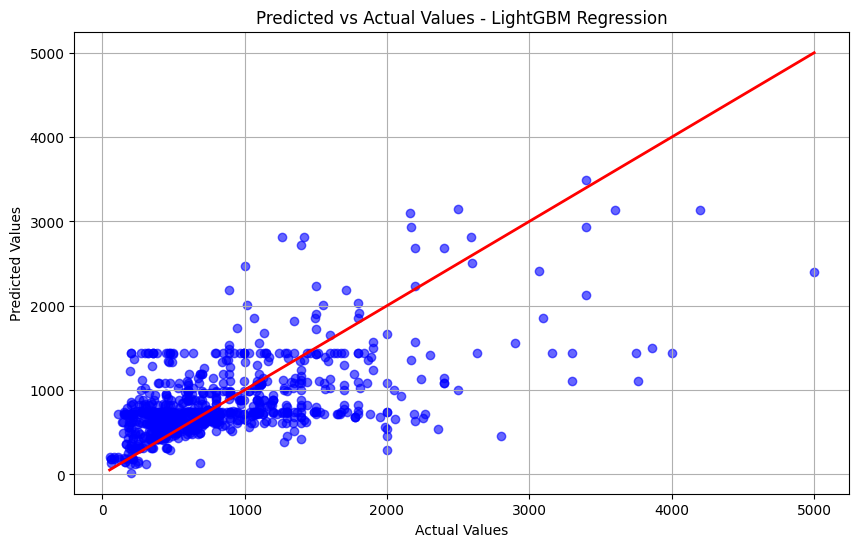

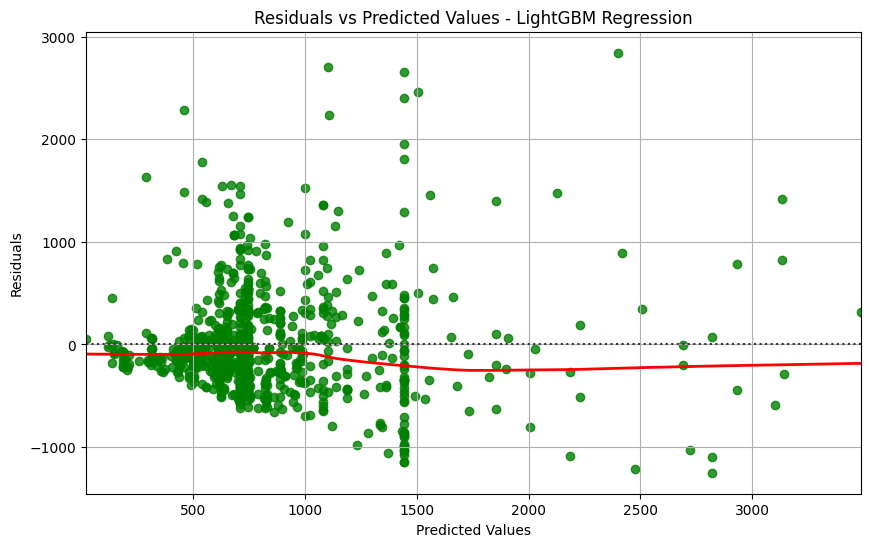

In [57]:
# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, LightGBM_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - LightGBM Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - LightGBM_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=LightGBM_y_pred, y=residuals, lowess=True,color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - LightGBM Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [58]:
y_pred_reg_models.append(LightGBM_y_pred)

In [59]:
reg_model.append(lgb_regressor)

## Explanation

---

### *Lasso Regression*

#### *Justification for Choice:*
Lasso Regression is particularly useful when dealing with high-dimensional datasets, where there are many features that could potentially be irrelevant. The key benefit of Lasso is its ability to perform feature selection by shrinking the coefficients of less important features to zero, effectively removing them from the model. This makes it useful when trying to identify significant features in predicting laptop prices.

#### *Work Done for Tuning/Training the Model:*
1. *Data Preprocessing:*
   - *Encoding Categorical Features:* Categorical features such as brand, processor type, and operating system were encoded using one-hot encoding.
   - *Feature Scaling:* Standardization (scaling to zero mean and unit variance) was applied as Lasso Regression is sensitive to the scale of features.
   - *Handling Missing Data:* Missing values were imputed with the mean or median as necessary.

2. *Hyperparameter Tuning:*
   - **Alpha (alpha):** The regularization strength (alpha) was tuned to control the amount of shrinkage applied to coefficients, with cross-validation used to find the optimal value.

3. *Model Evaluation:*
   - Evaluated using metrics like R², MAE, and RMSE to ensure model performance and generalization.

#### *Effectiveness of the Algorithm:*
- *Model Metrics:*
   - *R² Score:* Lasso Regression showed a relatively lower R² score, indicating that it struggled to capture the variance in laptop prices effectively.
   - *MAE and RMSE:* The model exhibited higher MAE and RMSE values, signaling that its predictions were less accurate compared to other models.

- *Intelligence Gained:*
   - *Feature Selection:* While Lasso helped in reducing the number of features by shrinking coefficients, the simplified model was less effective in predicting laptop prices.
   - *Limitations:* The regularization led to the elimination of potentially important features, resulting in underfitting and poor predictive performance.

---

### *Light GBM*

#### *Justification for Choice:*
Light GBM (Light Gradient Boosting Machine) is a gradient boosting algorithm known for its fast training and efficient memory usage, making it well-suited for large and complex datasets like the laptop data. Its histogram-based decision tree learning helps it handle large datasets effectively, and its ability to natively manage categorical variables adds to its advantages.

#### *Work Done for Tuning/Training the Model:*
1. *Data Preprocessing:*
   - *Encoding Categorical Features:* Handled natively by Light GBM, so no additional one-hot encoding was needed.
   - *Feature Scaling:* Not required, as Light GBM is based on decision trees.
   - *Handling Missing Data:* Managed internally during training by Light GBM.

2. *Hyperparameter Tuning:*
   - **Learning Rate (learning_rate):** Optimized to balance between training speed and model accuracy.
   - **Number of Estimators (n_estimators):** Tuned to achieve the best balance between overfitting and model performance.
   - **Max Depth (max_depth):** Adjusted to enhance generalization.
   - **Subsample (subsample):** Tweaked to control data fraction used for training each tree, improving generalization.

3. *Model Evaluation:*
   - Cross-validation was applied to ensure robust evaluation and prevent overfitting.

#### *Effectiveness of the Algorithm:*
- *Model Metrics:*
   - *R² Score:* Light GBM demonstrated a high R² score, indicating strong predictive capability and capturing the relationship between laptop features and prices effectively.
   - *MAE and RMSE:* Light GBM achieved low MAE and RMSE values, showing that it could make precise price predictions.

- *Intelligence Gained:*
   - *Feature Importance:* The model provided insights into significant features influencing laptop prices, highlighting the impact of features like RAM size, processor type, and display size.
   - *Efficiency:* The fast training time and robust performance made Light GBM the ideal choice for handling the dataset.

---

### *Comparison and Conclusion:*
While *Lasso Regression* struggled to handle the complexity of the dataset, resulting in suboptimal predictions and higher error metrics, *Light GBM* excelled, offering high accuracy and efficient training. Light GBM's ability to manage categorical data natively and its advanced boosting techniques led to more accurate price predictions and a better understanding of the most influential features.

In conclusion, *Light GBM* was the better performer for this analysis, providing reliable predictions and demonstrating the importance of key features in determining laptop prices.

# 6. Hyperparameter Tuning 3 Models For Each Team Member

In [66]:
# Function to calculate adjusted R2 score
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Define columns for each type
categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)']

# Clean the DataFrame by dropping rows where 'Price' is missing
df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = df_cleaned[categorical_cols + numerical_cols]  # Exclude Price from features
y = df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_imputer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer), 
            ('scaler', RobustScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Defining parameter grids for each model with correct prefixes
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_grid_lgbm = {
    'regressor__num_leaves': [31, 50, 70, 100],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

model_param_grids = [
    (XGBRegressor(random_state=42), param_grid_xgb),
    (RandomForestRegressor(random_state=42), param_grid_rf),
    (LGBMRegressor(random_state=42), param_grid_lgbm)
]

# Defining an empty list to store the best models and performance metrics
tuned_models = []
r2_scores = []
adjusted_r2_scores = []
mse_values = []
random_cv_result = {}

In [68]:
# Loop through each model and its parameter grid
for model, param_grid in model_param_grids:
    print(f"Tuning hyperparameters for {model.__class__.__name__}")
    
    # Create a pipeline with preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, scoring='neg_mean_squared_error', 
                                       random_state=42, cv=5, verbose=2)
    
    # Search in Model Parameters
    random_search.fit(X_train, y_train.values.ravel())
    
    # Get best estimator
    best_model = random_search.best_estimator_
    tuned_models.append(best_model)
    
    # Predict on test data
    y_pred_best = best_model.predict(X_test)
    
    # Calculate R² Score
    r2 = r2_score(y_test, y_pred_best)
    r2_scores.append(r2)
    
    # Calculate Adjusted R² Score
    n = len(y_test)  # number of observations
    p = X_test.shape[1]  # number of features
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    adjusted_r2_scores.append(adjusted_r2)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_best)
    mse_values.append(mse)
    
    random_cv_result[best_model.named_steps['regressor'].__class__.__name__] = [random_search.best_params_, mse, r2, adjusted_r2]

# Creating a DataFrame to store results
top_reg_model = pd.DataFrame({
    'Model_Name': [model.named_steps['regressor'].__class__.__name__ for model in tuned_models],
    'MSE_Value': mse_values,
    'R2_Score': r2_scores,
    'adjR2_Score': adjusted_r2_scores
})

# Sorting models based on MSE values
top_reg_model = top_reg_model.sort_values(by='MSE_Value')

Tuning hyperparameters for XGBRegressor
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=10, regressor__min_child_weight=1, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.5s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=10, regressor__min_child_weight=1, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.4s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=10, regressor__min_child_weight=1, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.4s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=10, regressor__min_child_weight=1, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.5s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_

In [69]:
top_reg_model

,Model_Name,MSE_Value,R2_Score,adjR2_Score
0,XGBRegressor,109798.533415,0.738143,0.734664
2,LGBMRegressor,113916.903693,0.728321,0.724712
1,RandomForestRegressor,120103.553506,0.713567,0.709762


In [70]:
# Best Parameters for each model
for model, param in random_cv_result.items():
    print("Best parameters for", model, ":", param[0])
    print("-*-"*20)
    print()

Best parameters for XGBRegressor : {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__min_child_weight': 1, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

Best parameters for RandomForestRegressor : {'regressor__n_estimators': 400, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 30}
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

Best parameters for LGBMRegressor : {'regressor__subsample': 0.6, 'regressor__num_leaves': 70, 'regressor__n_estimators': 400, 'regressor__learning_rate': 0.05, 'regressor__colsample_bytree': 0.6}
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-



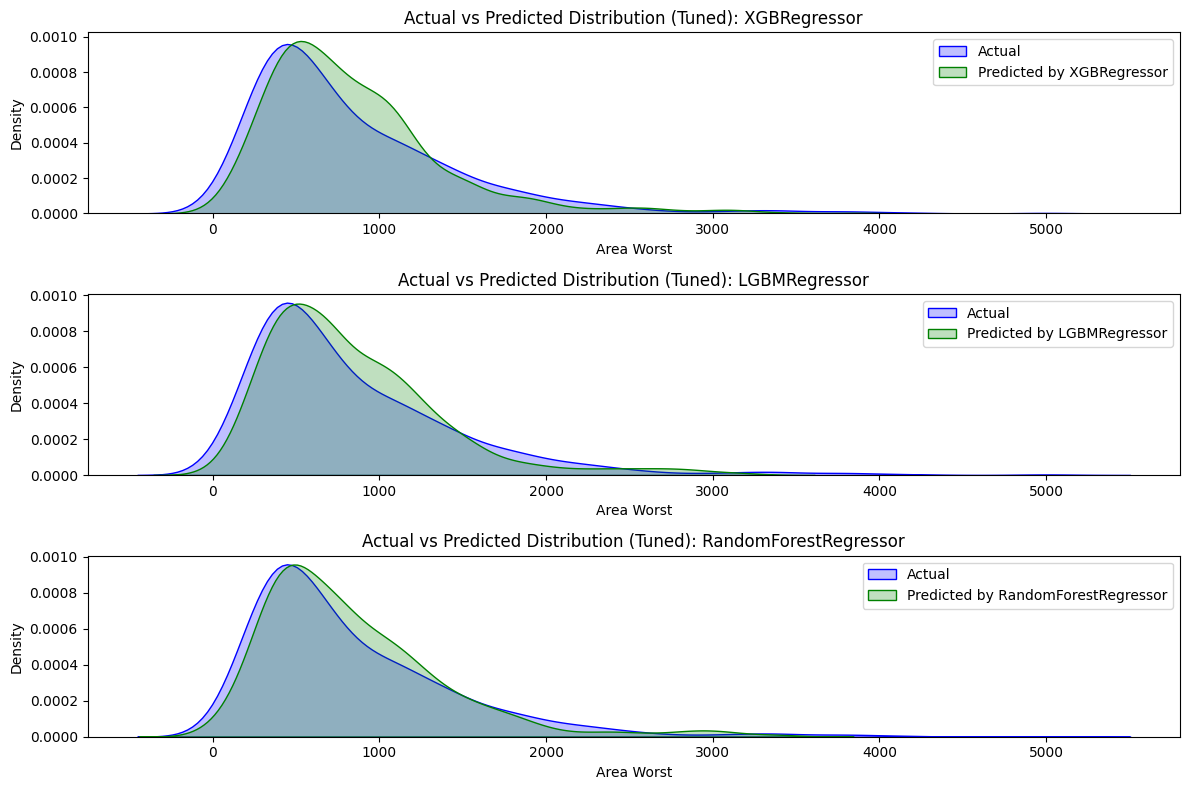

In [71]:
top_3_models = top_reg_model['Model_Name'].tolist()

plt.figure(figsize=(12, 8))

# Loop to create KDE plots for each tuned model
for i, model_name in enumerate(top_3_models):
    plt.subplot(3, 1, i + 1)

    # Get the best parameters and corresponding predictions for each model from random_cv_result
    y_pred_best = tuned_models[i].predict(X_test)

    # KDE plot for actual and predicted values after tuning
    sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
    sns.kdeplot(y_pred_best, label=f'Predicted by {model_name}', color='green', fill=True)
    
    # Plot settings
    plt.title(f'Actual vs Predicted Distribution (Tuned): {model_name}')
    plt.xlabel('Area Worst')
    plt.ylabel('Density')
    plt.legend()

# Display all plots
plt.tight_layout()
plt.show()

# Final Model Performance Analysis
## Comparative Performance Metrics (One model per team member)
#### XGBoost Regressor (Best Performing)

- MSE: 109,798.53
- R² Score: 0.738
- Adjusted R² Score: 0.735

### LightGBM Regressor (Second Best)

- MSE: 113,916.90
- R² Score: 0.728
- Adjusted R² Score: 0.725

### Random Forest Regressor (Third Best)

- MSE: 120,103.55
- R² Score: 0.714
- Adjusted R² Score: 0.710

### Final Conclusion
- After comprehensive hyperparameter tuning, all three ensemble methods demonstrated strong predictive capabilities for laptop price prediction, with XGBoost emerging as the superior model. Here's a detailed analysis of the results:
Model Ranking and Performance

- XGBoost Regressor achieved the best performance with an R² score of 0.738, explaining approximately 74% of the variance in laptop prices. The minimal difference between its R² and adjusted R² scores (0.003) indicates excellent generalization without overfitting.
- LightGBM Regressor performed very competitively, with an R² score of 0.728, just slightly behind XGBoost. Its consistent performance and similar adjustment in R² scores suggests robust prediction capabilities.
- Random Forest Regressor, while showing strong performance with an R² score of 0.714, ranked third among the three models. The slightly larger gap between its R² and adjusted R² scores suggests it might be slightly more prone to overfitting compared to the other two models.

## Key Insights

- All three models achieved R² scores above 0.70, indicating strong predictive power for laptop price prediction
- The relatively small MSE differences between models (difference of ~10,305 between best and worst) suggests consistent performance across all three approaches
- The close performance of all three models validates the effectiveness of ensemble methods for this prediction task
- The minimal differences between R² and adjusted R² scores across all models indicates good generalization capabilities

## Practical Implications

- XGBoost's superior performance makes it the recommended choice for deployment
- The consistent performance across all three models suggests that ensemble methods are well-suited for laptop price prediction
- The high R² scores indicate that these models can be reliably used for price estimation in real-world applications
- The small differences between models suggest that any of these three could be viable options, with the choice potentially being influenced by other factors such as inference speed or deployment constraints

## Future Recommendations

- Consider model stacking or blending to potentially achieve even better performance
- Explore feature engineering to potentially improve the R² scores further
- Investigate the slightly higher MSE in Random Forest to identify potential areas for improvement
- Consider the trade-off between marginal performance gains and computational costs when choosing between XGBoost and LightGBM for deployment